# <center>Preventing eCommerce Fraud with Data Science</center>
<p style="color:blue;">2019AB04292 Pawan Kumar - Jan 2022</p>

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions. 

Our objective here is to create the best classifier for credit car fraud detection. To acheive this, we'll compare classification models from different methods :

* Logistic regression
* Support Vector Machine
* Bagging (Random Forest)
* Gradient Boosting Trees (XGBoost)
* Neural Network (tensorflow/keras)

### Dataset: (https://www.openml.org/d/1597)

Author: Andrea Dal Pozzolo, Olivier Caelen and Gianluca Bontempi 

Source: Credit card fraud detection - Date 25th of June 2015 

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset present transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. More details on current and past projects on related topics are available on http://mlg.ulb.ac.be/BruFence and http://mlg.ulb.ac.be/ARTML.



### Model Evaluation in Credit Card Fraud Detection
* Accuracy isn't everything. When working with highly imbalanced data, accuracy is not a reliable performance metric. 
* Precision: True positives / (True positives + False Positives)  
* Recall : True positives / (True positives +False Negatives) 
* F1-score: 2 x Precision x Recall / (Precision + Recall) = 2 x TP / (2 x TP + FP + FN)   
* A credit card company wants to watch as much fraud as possible (reduce false negatives) as fraudulent transactios can be very costly and a false alarm means someone's transaction is blocked (reduce false positives). The credit card company therefore wants to optimize recall. F-score takes into account a balance between precision and recall.  
* Precision-Recall Curve(PR): Precision vs. Recall at various threshold settings.  
* Receiver Operating Characteristic Curve(ROC): Ture positive rate vs. False positive rate at various threshold settings. It's useful to compare performance of different algorithms for fraud detection.  
*  Area Under the Receiver Operating Characteristic Curve (ROCAUC):  
* The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't. 
* Confusion Matrix: shows how many fraud cases you can predict correctly.  

## Importing packages and data

In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/Users/Mamta/Downloads/Sem 4/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

/Users/Mamta/Downloads/Sem 4/input\credit-card-fraud-detection-models.ipynb
/Users/Mamta/Downloads/Sem 4/input\credit-card-fraud-detection.ipynb
/Users/Mamta/Downloads/Sem 4/input\creditcard.csv
/Users/Mamta/Downloads/Sem 4/input\fraudTest.csv
/Users/Mamta/Downloads/Sem 4/input\fraudTrain.csv
/Users/Mamta/Downloads/Sem 4/input\PS_20174392719_1491204439457_log.csv
/Users/Mamta/Downloads/Sem 4/input\.ipynb_checkpoints\credit-card-fraud-detection - mid sem-checkpoint.ipynb
/Users/Mamta/Downloads/Sem 4/input\.ipynb_checkpoints\credit-card-fraud-detection-checkpoint.ipynb
/Users/Mamta/Downloads/Sem 4/input\.ipynb_checkpoints\credit-card-fraud-detection-models - mid sem-checkpoint.ipynb
/Users/Mamta/Downloads/Sem 4/input\.ipynb_checkpoints\credit-card-fraud-detection-models-checkpoint.ipynb


In [2]:
# Reading the data set
df = pd.read_csv("/Users/Mamta/Downloads/Sem 4/input/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Now, let's have a look at the class :

In [3]:
df.shape

(284807, 31)

<AxesSubplot:xlabel='Class', ylabel='count'>

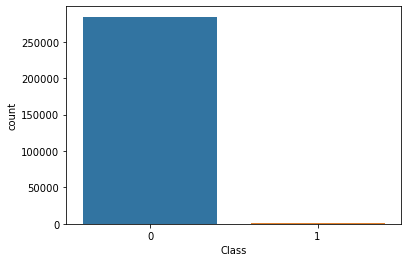

In [4]:
sns.countplot(x="Class", data=df)

### Dataset Summary:
* We have 284807 entries within 30 features and 1 target (Class).   
* There are no "Null" values, so no need to work on ways to replace values.   
* The mean of all the amounts made is relatively small, approximately USD 88.  
* Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe. 

## Distribution of 2 Features : Time and Amount

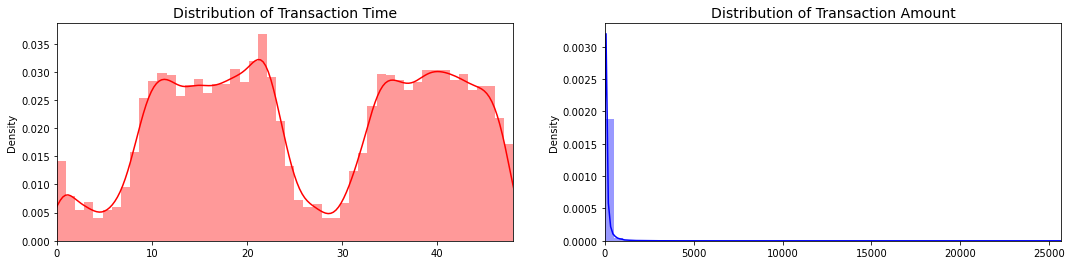

In [5]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

### Summary:
* Time: Most transactions happended in day time.  
* Mean of transaction amount is 88 USD and 75% quatile is 77 USD. 
* We should better scale these two skewed features also. 

## Cut Up the Dataset into Two Datasets and Summarize 

In [6]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

###  Transaction Amount Visualization
Expect a lot of low-value transactions to be uninteresting (buying cups of coffee, lunches, etc).  Only visualizes the transactions between USD 200 and 2000. 

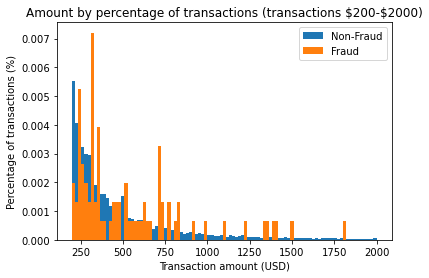

In [7]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1, density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### Summary:
* In the long tail, fraud transaction happened more frequently. 
* It seems 
It would be hard to differentiate fraud from normal transactions by transaction amount alone.

###  Transaction Hour
Let's look at the transaction percentage from day 0 to the next day. 

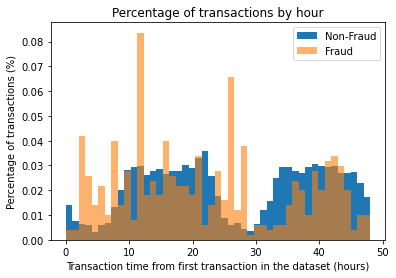

In [8]:
# Plot of transactions in 48 hours
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

Hour "zero" corresponds to the hour the first transaction happened and not necessarily 12-1am.   
Given the heavy decrease in normal transactions from hours 1 to 8 and again roughly at hours 24 to 32, it seems fraud tends to occur at higher rates during the night. Statistical tests could be used to give evidence for this fact.

###  Transaction Amount vs. Hour

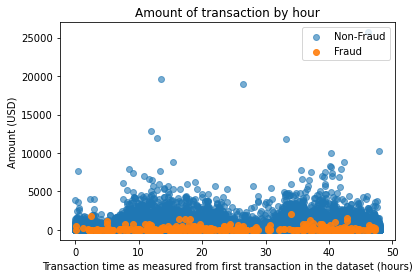

In [9]:
# Plot of transactions in 48 hours
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

It is not enough to make a good classifier. For example, it would be hard to draw a line that cleanly separates fraud and non-fraud transactions. 

## Feature Scaling
As we know before, features V1-V28 have been transformed by PCA and scaled already.  Whereas feature "Time" and "Amount" have not. And considering that we will analyze these two features with other V1-V28, they should better be scaled before we train our model using various algorithms.
Here is [why and how](https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1).  

Time is not needed for classification so removing this feature from the dataset :

In [10]:
df = df.drop("Time", axis=1)

We need to standardize the 'Amount' feature before modelling. 
For that, we use the StandardScaler function from sklearn. Then, we just have to drop the old feature :

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

The dataset is highly imbalanced ! 
It's a big problem because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To overcome that, we will proceed for random undersampling.  

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.


### <center>How undersampling works :</center>
<center><img src= "https://miro.medium.com/max/335/1*YH_vPYQEDIW0JoUYMeLz_A.png">


To undersample, we can use the package imblearn with RandomUnderSampler function !

In [12]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [13]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [14]:
#define X and Y
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [15]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

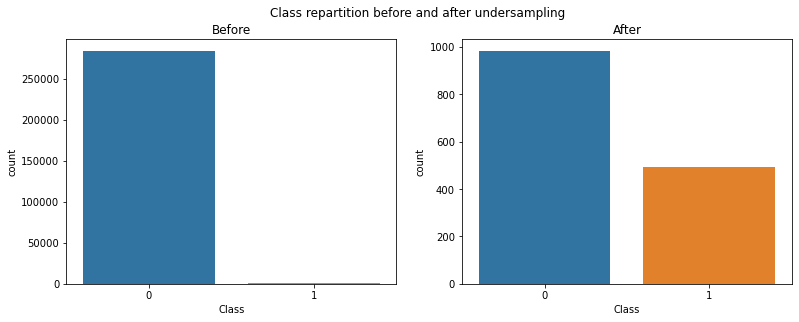

In [16]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

Our dataset is now evenly balanced. The last step before modelling is now to split the data intro train and test samples. The test set will be composed of 20% of the data. To split the data, we can use train_test_split function from sklearn !

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

Now we are ready for modeling so Let's try to predict credit card frauds with different models. 

# 1. Logistic Regression

### <center> How Logistic regression works :

<center><img src= "https://saedsayad.com/images/LogReg_1.png">

In Logistic Regression, input values (X) are combined linearly using weights or coefficient values to predict an output value (y). 
A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value. Logistic regression is a linear method, but the predictions are transformed using the logistic function.

In [18]:
# train the model
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train, y_train)

In [19]:
# Logistic Regression Predictions
y_pred_logit = model1.predict(X_test) 

In [20]:
# Logistic Regression scores
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision :",metrics.precision_score(y_test, y_pred_logit))
print("Recall :",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score :",metrics.f1_score(y_test, y_pred_logit))

Accuracy : 0.9594594594594594
Precision : 0.98
Recall : 0.9074074074074074
F1 Score : 0.9423076923076924


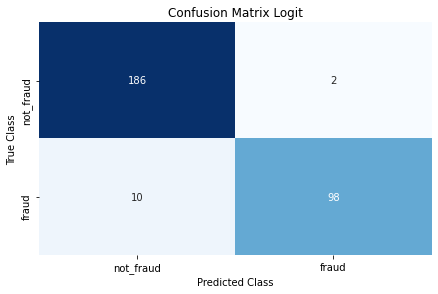

In [21]:
#print Confusion Matrix
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [22]:
# Logistic Regression AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.969316390858944


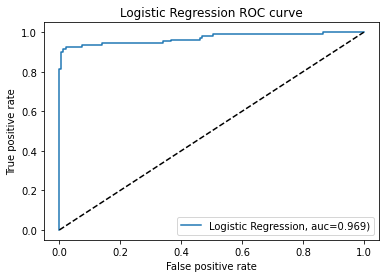

In [23]:
# Logistic Regression ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

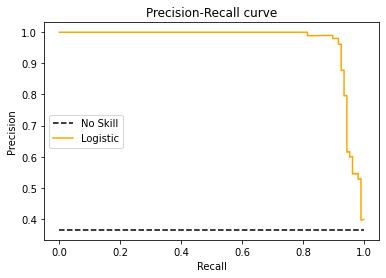

In [24]:
# Logistic Regression Precision Recall curve
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [25]:
print("Classification metrics for Logistic Regression (rounded down) :\n")
print("- Accuracy :",metrics.accuracy_score(y_test, y_pred_logit))
print("- F1 Score :",metrics.f1_score(y_test, y_pred_logit))
print("- AUC Logistic Regression :", auc_logit)

Classification metrics for Logistic Regression (rounded down) :

- Accuracy : 0.9594594594594594
- F1 Score : 0.9423076923076924
- AUC Logistic Regression : 0.969316390858944


# 2. Support Vector Machine

### <center> How SVM works : </center>

<center><img src= "https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-07-at-3.44.38-PM.png">

SVM Classifier uses a technique called the kernel trick to transform the data and then based on these transformations it finds an optimal boundary (hyper-plane) between the possible outputs.
Support vector machines focus only on the points that are the most difficult to tell apart, whereas other classifiers pay attention to all of the points.

In [26]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [27]:
# SVM predictions
y_pred_svm = model2.predict(X_test)

In [28]:
# SVM scores
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision :",metrics.precision_score(y_test, y_pred_svm))
print("Recall :",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score :",metrics.f1_score(y_test, y_pred_svm))

Accuracy : 0.9425675675675675
Precision : 0.9789473684210527
Recall : 0.8611111111111112
F1 Score : 0.9162561576354681


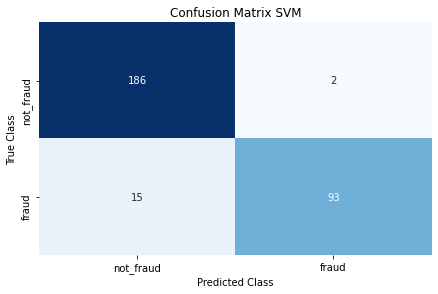

In [29]:
# SVM Confusion Matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [30]:
# SVM Area Under Curve (AUC)
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC :", auc_svm)

AUC : 0.9756205673758865


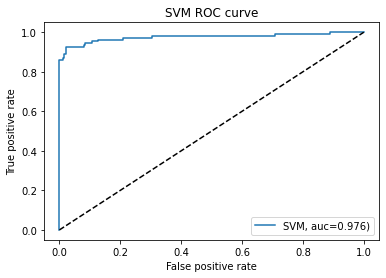

In [31]:
# SVM ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

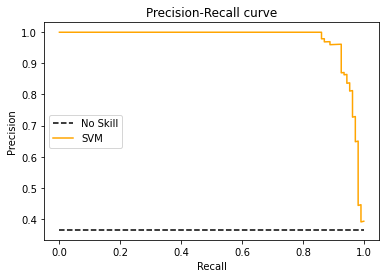

In [32]:
# SVM Precision-Recall curve
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [33]:
print("Classification metrics for SVM (rounded down) :\n")
print("- Accuracy :",metrics.accuracy_score(y_test, y_pred_svm))
print("- F1 Score :",metrics.f1_score(y_test, y_pred_svm))
print("- AUC :", auc_svm)

Classification metrics for SVM (rounded down) :

- Accuracy : 0.9425675675675675
- F1 Score : 0.9162561576354681
- AUC : 0.9756205673758865


# 3. Ensemble learning : Bagging (Random Forest)

### <center> How Random Forest works : </center>

<center><img src= "https://miro.medium.com/max/567/1*Mb8awDiY9T6rsOjtNTRcIg.png">

<center>"A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models"</center>

Random forest consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [34]:
#train the model
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [35]:
# Random Forest predictions
y_pred_rf = model3.predict(X_test)

In [36]:
# Random Forest scores
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision :",metrics.precision_score(y_test, y_pred_rf))
print("Recall :",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score :",metrics.f1_score(y_test, y_pred_rf))

Accuracy : 0.956081081081081
Precision : 0.9896907216494846
Recall : 0.8888888888888888
F1 Score : 0.9365853658536585


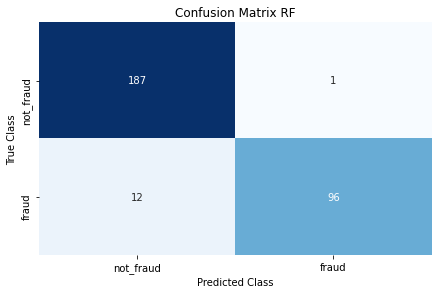

In [37]:
# Random Forest Conusion Matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [38]:
# Random Forest AUC
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9652039007092198


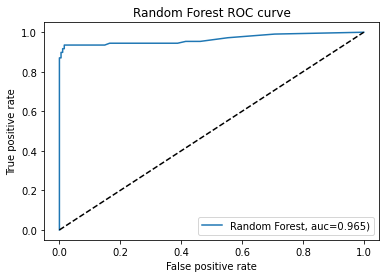

In [39]:
# Random Forest ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

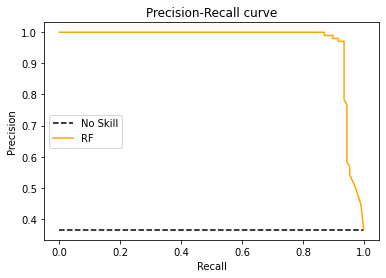

In [40]:
# Random Forest Precision-Recall curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [41]:
print("Classification metrics for Random Forest (rounded down) :\n")
print("- Accuracy :",metrics.accuracy_score(y_test, y_pred_rf))
print("- F1 Score :",metrics.f1_score(y_test, y_pred_rf))
print("- AUC Random Forest :", auc_rf)

Classification metrics for Random Forest (rounded down) :

- Accuracy : 0.956081081081081
- F1 Score : 0.9365853658536585
- AUC Random Forest : 0.9652039007092198


# 4. Ensemble learning : Gradient Boosting Trees (XGBoost)

### <center> How XGBoost works :</center>

![](https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png)

The sequential ensemble methods, also known as “boosting”, creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence. The first model is built on training data, the second model improves the first model, the third model improves the second, and so on. 

In [42]:
#train the model
model4 = XGBClassifier(random_state=2)
xgb = model4.fit(X_train, y_train)

[13:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [43]:
# Boosting Predictions
y_pred_xgb = model4.predict(X_test) 

In [44]:
# Boosting scores
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision :",metrics.precision_score(y_test, y_pred_xgb))
print("Recall :",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score :",metrics.f1_score(y_test, y_pred_xgb))

Accuracy : 0.9493243243243243
Precision : 0.9603960396039604
Recall : 0.8981481481481481
F1 Score : 0.9282296650717703


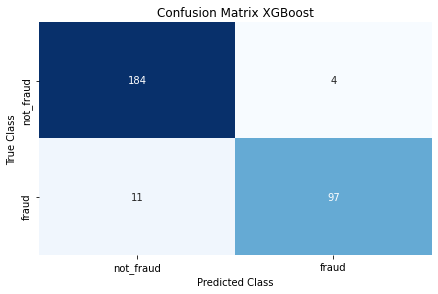

In [45]:
# Boosting Confusion Matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [46]:
# Boosting AUC
y_pred_xgb_proba = model4.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.9700059101654847


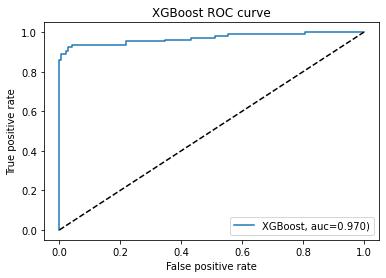

In [47]:
# Boosting ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

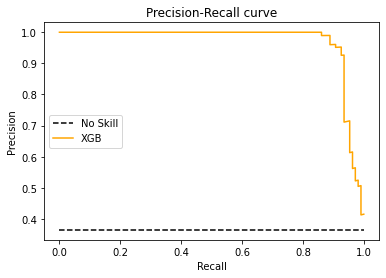

In [48]:
# Boosting Precision-Recall curve
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [49]:
print("Classification metrics for XGBoost (rounded down) :\n")
print("- Accuracy :",metrics.accuracy_score(y_test, y_pred_xgb))
print("- F1 Score :",metrics.f1_score(y_test, y_pred_xgb))
print("- AUC :", auc_xgb)

Classification metrics for XGBoost (rounded down) :

- Accuracy : 0.9493243243243243
- F1 Score : 0.9282296650717703
- AUC : 0.9700059101654847


# 5. Multi Layer Perceptron

### <center> How Neural network works : </center>

<center><img src= "https://victorzhou.com/27cf280166d7159c0465a58c68f99b39/network3.svg">

The layers of a neural network are made of nodes. 
A node combines input from the data with a set of coefficients and bias, that either amplify or dampen that input, thereby assigning significance to inputs with regard to the task the algorithm is trying to learn. These input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine whether and to what extent that signal should progress further through the network to affect the ultimate outcome, say, an act of classification. If the signals passes through, the neuron has been “activated.”

In [50]:
#train the model
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model5.fit(X_train, y_train)

In [51]:
model5.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [52]:
# Multi Layer Perceptron Predictions
y_pred_mlp = model5.predict(X_test)

In [53]:
# Multi Layer Perceptron scores
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision :",metrics.precision_score(y_test, y_pred_mlp))
print("Recall :",metrics.recall_score(y_test, y_pred_mlp))
print("F1 Score :",metrics.f1_score(y_test, y_pred_mlp))

Accuracy : 0.9391891891891891
Precision : 0.9166666666666666
Recall : 0.9166666666666666
F1 Score : 0.9166666666666666


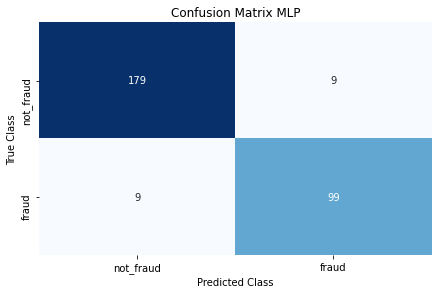

In [54]:
# Multi Layer Perceptron Confusion Matrix
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [55]:
# Multi Layer Perceptron AUC
y_pred_mlp_proba = model5.predict_proba(X_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.9711633175728921


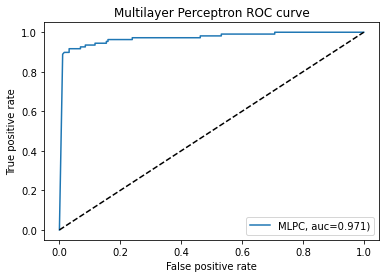

In [56]:
# Multi Layer Perceptron ROC
plt.plot(fpr_mlp,tpr_mlp,label="MLPC, auc={:.3f})".format(auc_mlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Multilayer Perceptron ROC curve')
plt.legend(loc=4)
plt.show()

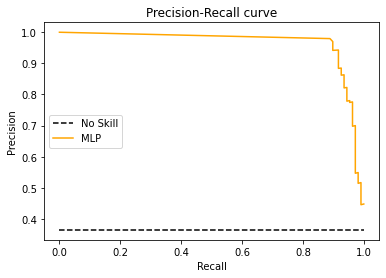

In [57]:
# Multi Layer Perceptron Precision-Recall curve
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_mlp_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(mlp_recall, mlp_precision, color='orange', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [58]:
print("Classification metrics for Multi Layer Perceptron (rounded down) :\n")

print("- Accuracy :",metrics.accuracy_score(y_test, y_pred_mlp))
print("- F1 Score :",metrics.f1_score(y_test, y_pred_mlp))
print("- AUC :", auc_mlp)

Classification metrics for Multi Layer Perceptron (rounded down) :

- Accuracy : 0.9391891891891891
- F1 Score : 0.9166666666666666
- AUC : 0.9711633175728921


# 6. Multilayer Neural Network with Tensorflow/Keras

<center><img src= "https://www.researchgate.net/profile/Ke_Li175/publication/335193975/figure/download/fig1/AS:792360720015361@1565924925903/Schematic-representation-of-a-multilayer-neural-network-which-contains-7-input-units-5.ppm">

In [59]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile(optimizer= 'adam' , loss= keras.losses.binary_crossentropy, metrics=['accuracy'])

In [61]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)

In [62]:
history = model.fit(X_train.values, y_train.values, epochs = 15, batch_size=5, validation_split = 0.15, verbose = 0,
                    callbacks = [earlystopper])
history_dict = history.history

Text(0.5, 0, 'Epochs')

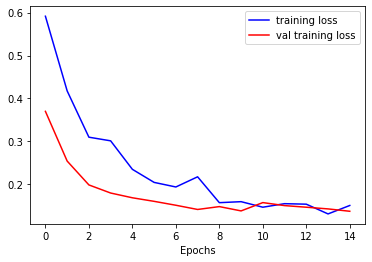

In [63]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

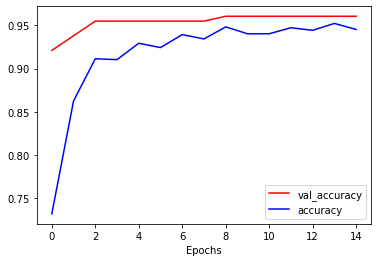

In [64]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [65]:
# Multilayer Neural Network Predictions
y_pred_nn = model.predict_classes(X_test)

In [66]:
# Multilayer Neural Network scores
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision :",metrics.precision_score(y_test, y_pred_nn))
print("Recall :",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score :",metrics.f1_score(y_test, y_pred_nn))

Accuracy : 0.9662162162162162
Precision : 0.9803921568627451
Recall : 0.9259259259259259
F1 Score : 0.9523809523809523


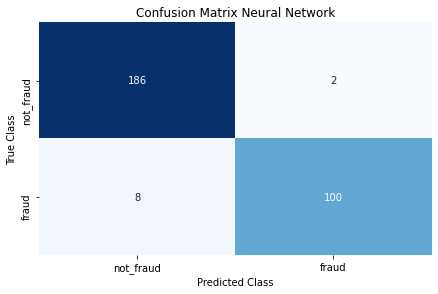

In [67]:
# Multilayer Neural Network Confusion Matrix
matrix_nn = confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])
sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [68]:
# Multilayer Neural Network AUC
y_pred_nn_proba = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test,y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)
print('AUC Neural Net: ', auc_keras)

AUC Neural Net:  0.9761623325453113


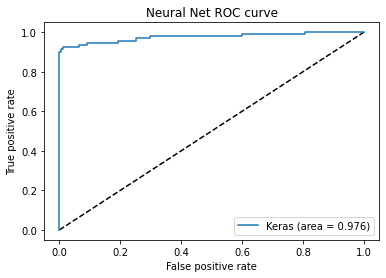

In [69]:
# Multilayer Neural Network ROC
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Neural Net ROC curve')
plt.legend(loc='best')
plt.show()

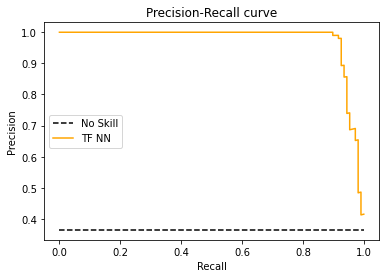

In [70]:
# Multilayer Neural Network Precision-Recall curve
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [71]:
print("Classification metrics for Multilayer Neural Network (rounded down) :\n")
print("- Accuracy :",metrics.accuracy_score(y_test, y_pred_nn))
print("- F1 Score :",metrics.f1_score(y_test, y_pred_nn))
print('- AUC Neural Net: ', auc_keras)

Classification metrics for Multilayer Neural Network (rounded down) :

- Accuracy : 0.9662162162162162
- F1 Score : 0.9523809523809523
- AUC Neural Net:  0.9761623325453113


# 7. Conclusion
Finding the most efficient technique to detect the fraud from credit card is quite challenging. But, it is possible to curb the number of frauds through accurate analysis of the data collected from several credit card transactions. Therefore, in this project, I have presented a brief survey of applications of basic machine learning algorithms towards fraud detection. The key criteria of survey was to select the best machine learning algorithms; among LR, SVM, RF, XGBoost and ANN; and find their ability in performing classification of unseen observation to a class, by having the classifiers trained with the history of transactions. 